<a href="https://colab.research.google.com/github/kannursaya/Fast-Food-Data-Analysis/blob/main/fast_food_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/FastFoodNutritionMenuV3.csv")
df.columns = df.columns.str.strip().str.replace("\n", " ")
df[['Calories', 'Protein (g)', 'Total Fat (g)', 'Carbs (g)']] = df[['Calories', 'Protein (g)', 'Total Fat (g)', 'Carbs (g)']].apply(pd.to_numeric, errors='coerce')  # Now using cleaned names
print(df.info())
print(df.head())
print("\nMissing values:\n", df.isnull().sum())

print(df.describe())
print(df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1147 non-null   object 
 1   Item                  1147 non-null   object 
 2   Calories              1133 non-null   float64
 3   Calories from Fat     642 non-null    object 
 4   Total Fat (g)         1079 non-null   float64
 5   Saturated Fat (g)     1091 non-null   object 
 6   Trans Fat (g)         1091 non-null   object 
 7   Cholesterol (mg)      1147 non-null   object 
 8   Sodium  (mg)          1147 non-null   object 
 9   Carbs (g)             1078 non-null   float64
 10  Fiber (g)             1091 non-null   object 
 11  Sugars (g)            1147 non-null   object 
 12  Protein (g)           1079 non-null   float64
 13  Weight Watchers Pnts  887 non-null    object 
dtypes: float64(4), object(10)
memory usage: 125.6+ KB
None
      Company    

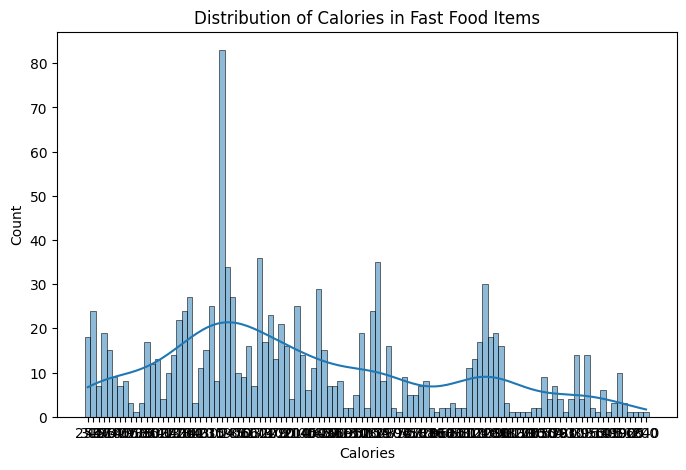

In [ ]:
# Visualization: Distribution of Calories
plt.figure(figsize=(8, 5))
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title("Distribution of Calories in Fast Food Items")
plt.xlabel("Calories")
plt.ylabel("Count")
plt.show()

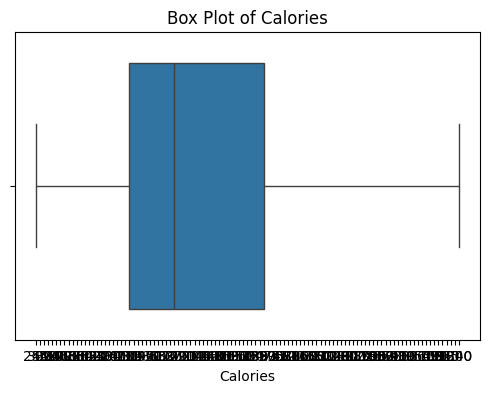

In [ ]:
# Box Plot of Calories
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Calories'])
plt.title("Box Plot of Calories")
plt.savefig("calories_box.png")
plt.show()

68


<ipython-input-20-fe78ec62421c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_protein['Protein (g)'], y=top_protein['Item'], palette='coolwarm')


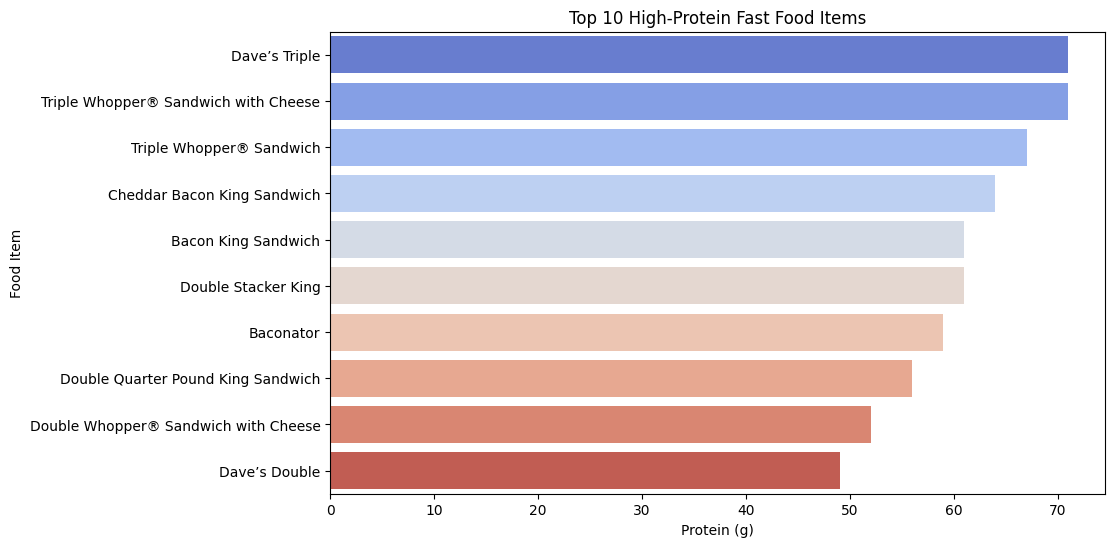

In [ ]:
# Top 10 High-Protein Items
df.columns = df.columns.str.strip()
df['Protein (g)'] = pd.to_numeric(df['Protein (g)'], errors='coerce')
print(df['Protein (g)'].isna().sum())
top_protein = df.sort_values(by='Protein (g)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_protein['Protein (g)'], y=top_protein['Item'], palette='coolwarm')
plt.title("Top 10 High-Protein Fast Food Items")
plt.xlabel("Protein (g)")
plt.ylabel("Food Item")
plt.savefig("top_protein.png")
plt.show()

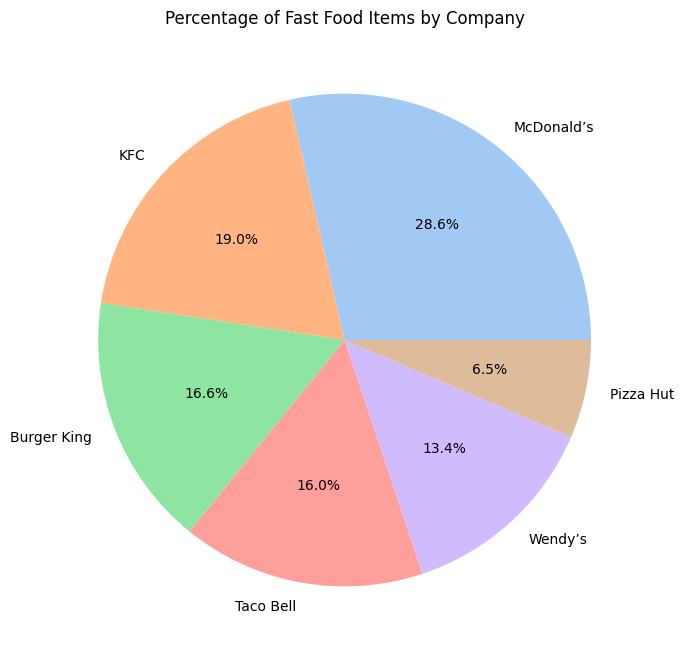

In [ ]:
# Percentage of Fast Food Items by Company
company_counts = df['Company'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Percentage of Fast Food Items by Company")
plt.savefig("fast_food_comp.png")
plt.show()

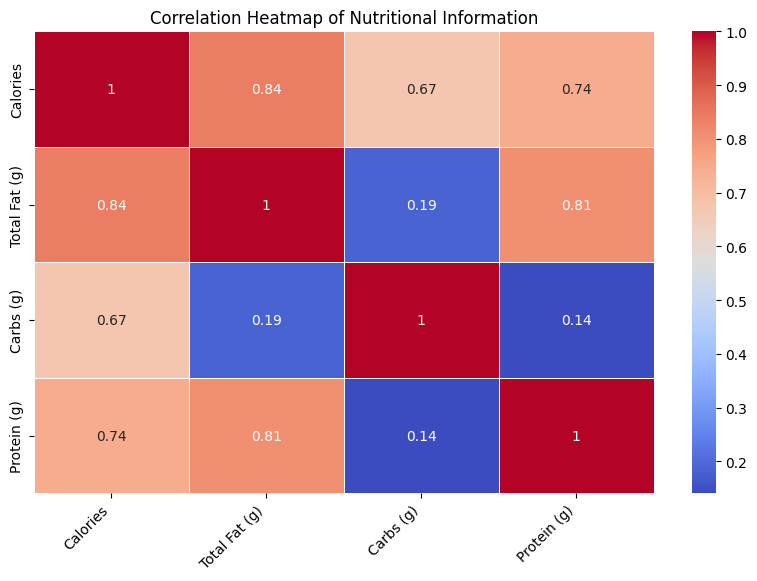

In [ ]:
# Correlation heatmap of Nutritional Information
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Nutritional Information")
plt.xticks(rotation=45, ha='right')
plt.savefig("correlation_heatmap.png")
plt.show()